### Part 2. HW  
**1) Part 2의 code를 수정해서 (Strong likelihood, Weak likelihood) $\times$ (Uninformative prior, Weak prior, Strong prior)의 6가지 경우 비교해보기**  
  
  


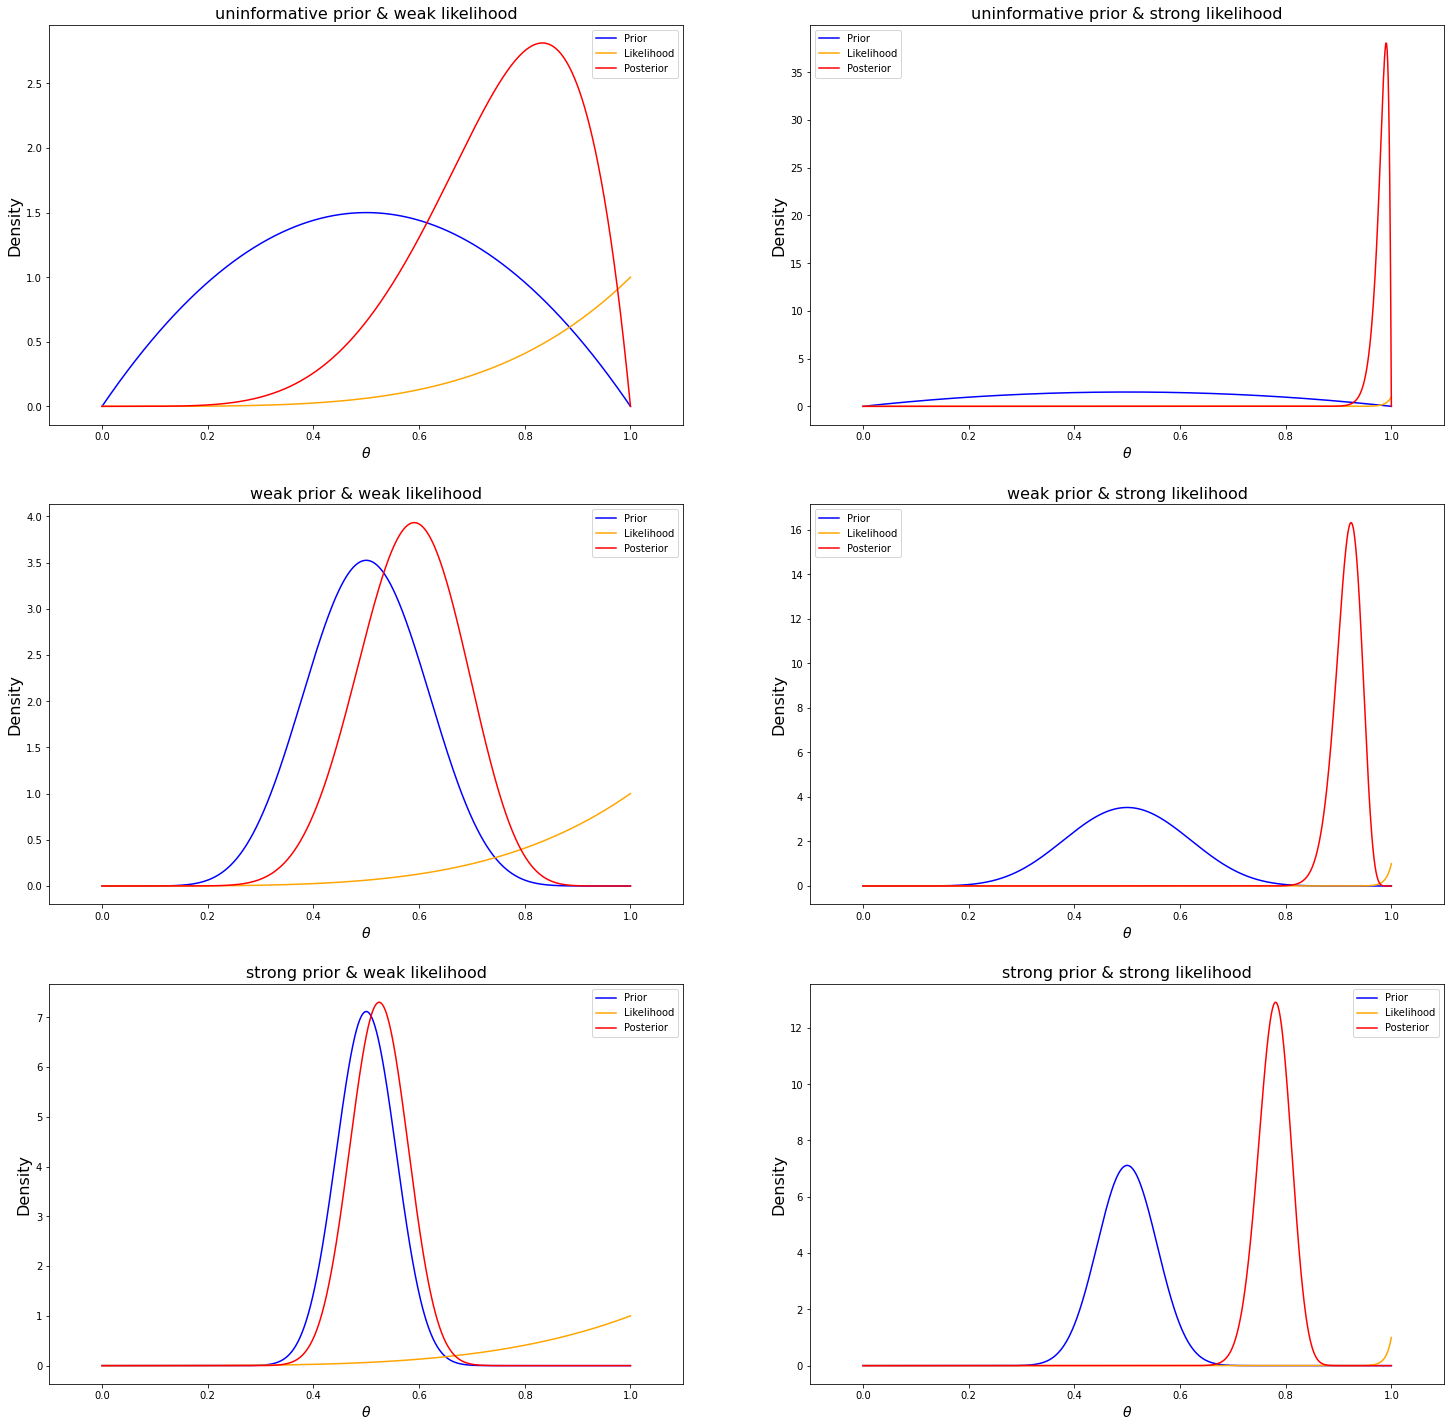

In [1]:
import numpy as np
import scipy
import scipy.stats as st
from random import random
import inspect

import matplotlib.pyplot as plt
import seaborn as sns

def likelihood(theta, n, y):
    return theta**y*(1-theta)**(n-y)

thetas = np.linspace(0, 1, 1000)

a = [2,10,40]
b = [2,10,40]
n = [4,100]
y = [4,100]
m_1 = ['uninformative prior','weak prior','strong prior']
m_2 = ['weak likelihood','strong likelihood']

fig,ax = plt.subplots(3,2,figsize=(25,25))

for i in range(3):
    for j in range(2):
        prior = st.beta(a=a[i], b=b[i])
        post = st.beta(a=a[i]+y[j], b=b[i]+(n[j]-y[j]))
        ax[i,j].plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
        ax[i,j].plot(thetas, likelihood(thetas, n[j], y[j]), label='Likelihood', c='orange')
        ax[i,j].plot(thetas, post.pdf(thetas), label='Posterior', c='red')
        ax[i,j].set_xlim([-0.10, 1.10])
        ax[i,j].set_title(m_1[i]+' & '+m_2[j],fontsize=16)
        ax[i,j].set_xlabel(r'$\theta$', fontsize=14)
        ax[i,j].set_ylabel('Density', fontsize=16)
        ax[i,j].legend()



**2) BDA 1.3 Exercise**  
Suppose that in each individual of a large population there is a pair of genes, each of which can be either x of X, that controls eye color: those with xx have blue eyes, while heterozygotes (those with Xx or xX) and those with XX have brown eyes. The proportion of blue-eyed individuals is $p^2$ and of heterozygotes is $2p(1-p)$, where $0<p<1$. Each parent transmits one of tis own genes to the child; if a parent is a heterozygote, the probability that it transmits one of its own genes to the child; if a parent is a heterozygotes, the probability that it transmits the gene of type X is $\frac{1}{2}$. Assuming random mating, show that among brown-eyed children of brown-eyed parents, the expected proportion of heterozygotes is $\frac{2p}{1+2p}$. Suppose Judy, a brown-eyed child of brown-eyed parents, marries a heterozygote, and they have n children, all brown-eyed. Find the posterior probability that Judy is a heterozygote and the probability that her first grandchild hs blue eyes. 
  
 

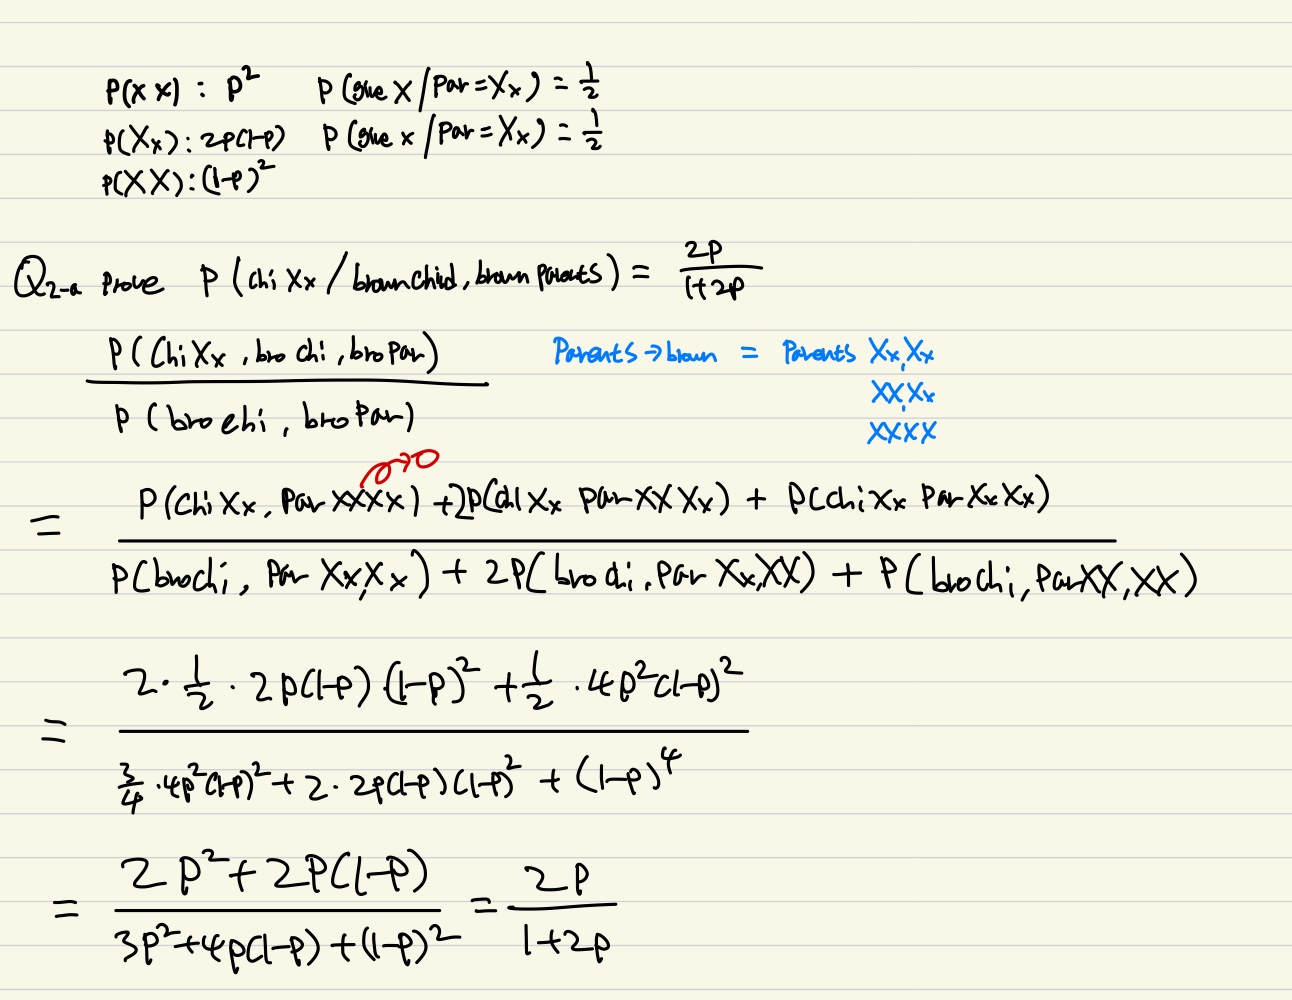

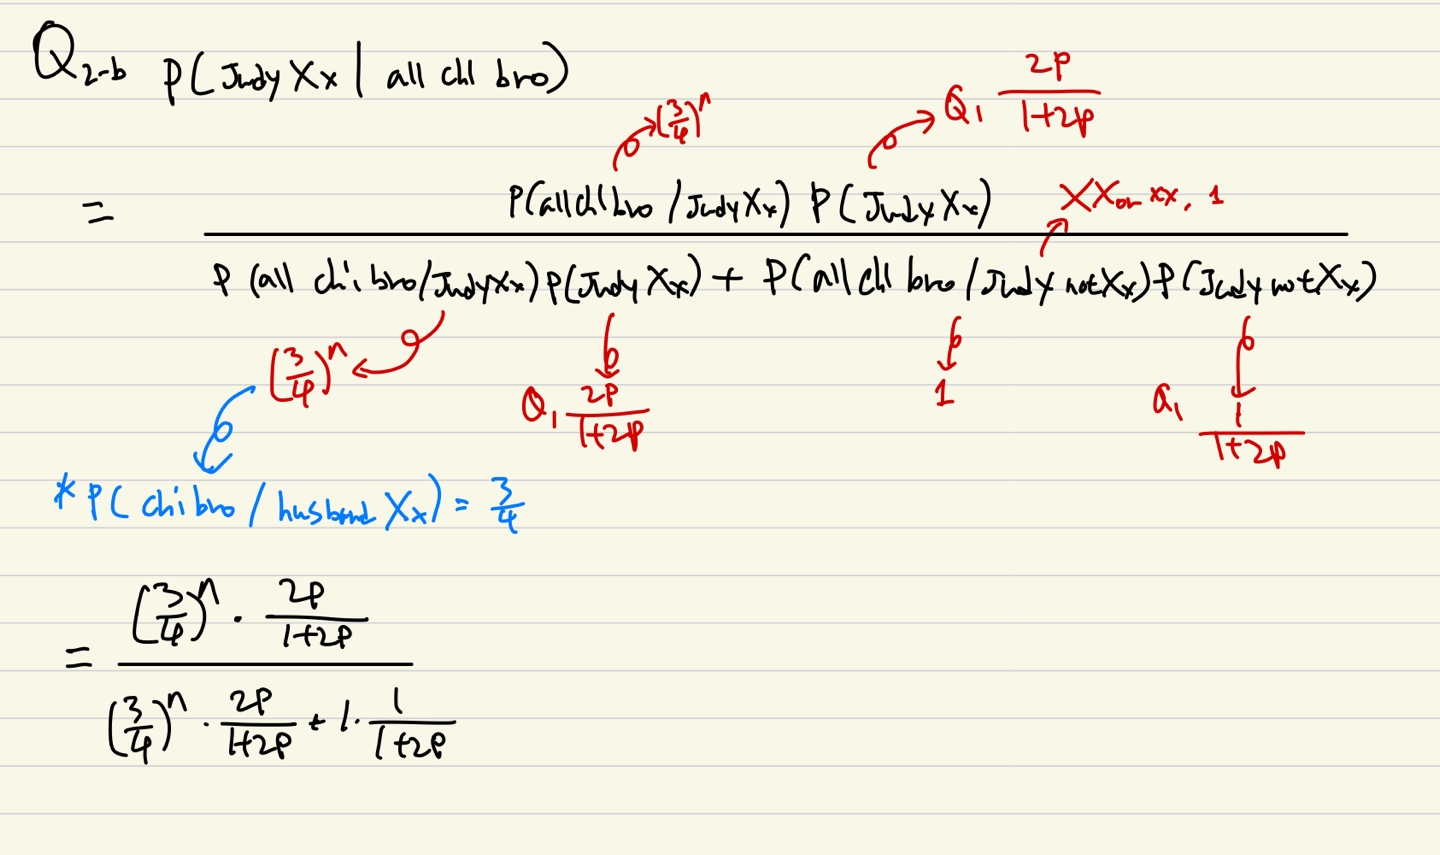

  
3-a) \textbf{Beta} distribution으로 위의 \textbf{belief}을 survival rate에 관한 \textbf{prior distribution}으로 나타내라. Parameter $\alpha, \beta$는 어떻게 선정하면 좋을 것인가? 
(Hint : 여러분의 믿음의 강도 따라 $\alpha, \beta$의 답이 달라질 수 있다. 하나의 정답을 맞추는 것이 아니라 실생활의 문제를 해석하는 힘을 기르는 것이 취지라 하겠다.)

-> 믿음은 베타 dist를 따르고, [0.8,0.97] 사이에서 주로 0이 아닌 값을 가지며, 최빈값은 0.9로 설정한다. 따라서 베타  dist의 모수 a, b의 합인 w가 상대적으로 큰 값을 가져야 할 것이다. 
  


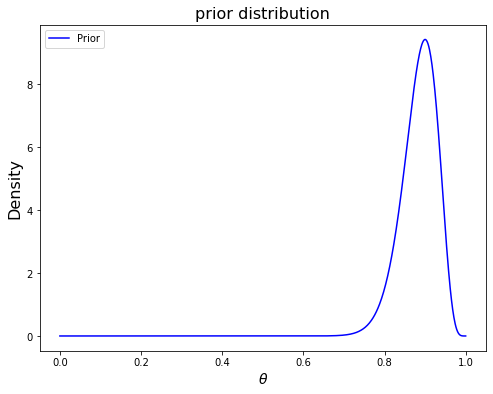

In [ ]:
import numpy as np
import scipy
import scipy.stats as st
from random import random
import inspect

import matplotlib.pyplot as plt
import seaborn as sns

thetas = np.linspace(0, 1, 1000)

# 0.8~0.97에 밀집되게 파라미터 조정
#prior = st.beta(10, 2)
prior = st.beta(46, 6)
#prior = st.beta(91, 11)

plt.figure(figsize=(8, 6))
plt.plot(thetas, prior.pdf(thetas), label='Prior',c='blue')
plt.title('prior distribution',fontsize=16)
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend()

3-b) 이제 \textbf{data gathering}. 10명의 환자에 수술을 진행해 모두 생존하였다. survival rate에 관한 \textbf{Posterior Distribution} 구하기.  
  

sol) 3-a의 분포에 likelihood를 곱하여 사후분포를 구하고자 한다. 이항분포의 likelihood를 사용하였다. 10명 중 10명이 생존이므로 n = 10, x = 10이다. likelyhood와 prior dist는 conjugacy 관계를 가지므로, posterior dist도 beta dist를 따른다.  


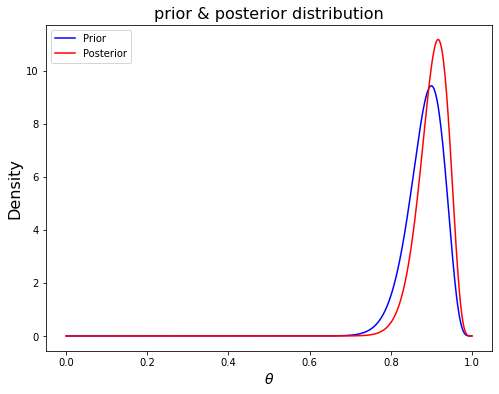

In [ ]:
plt.figure(figsize=(8, 6))
post = st.beta(56,6)
plt.plot(thetas, prior.pdf(thetas), label='Prior',c='blue')
plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
plt.title('prior & posterior distribution',fontsize=16)
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend()


3-c) 다음 환자가 생존할 확률과 다음 20명의 환자 중 2명 이상 사망할 확률을 각각 예측하시오. (Hint : Posterior Predictive) 


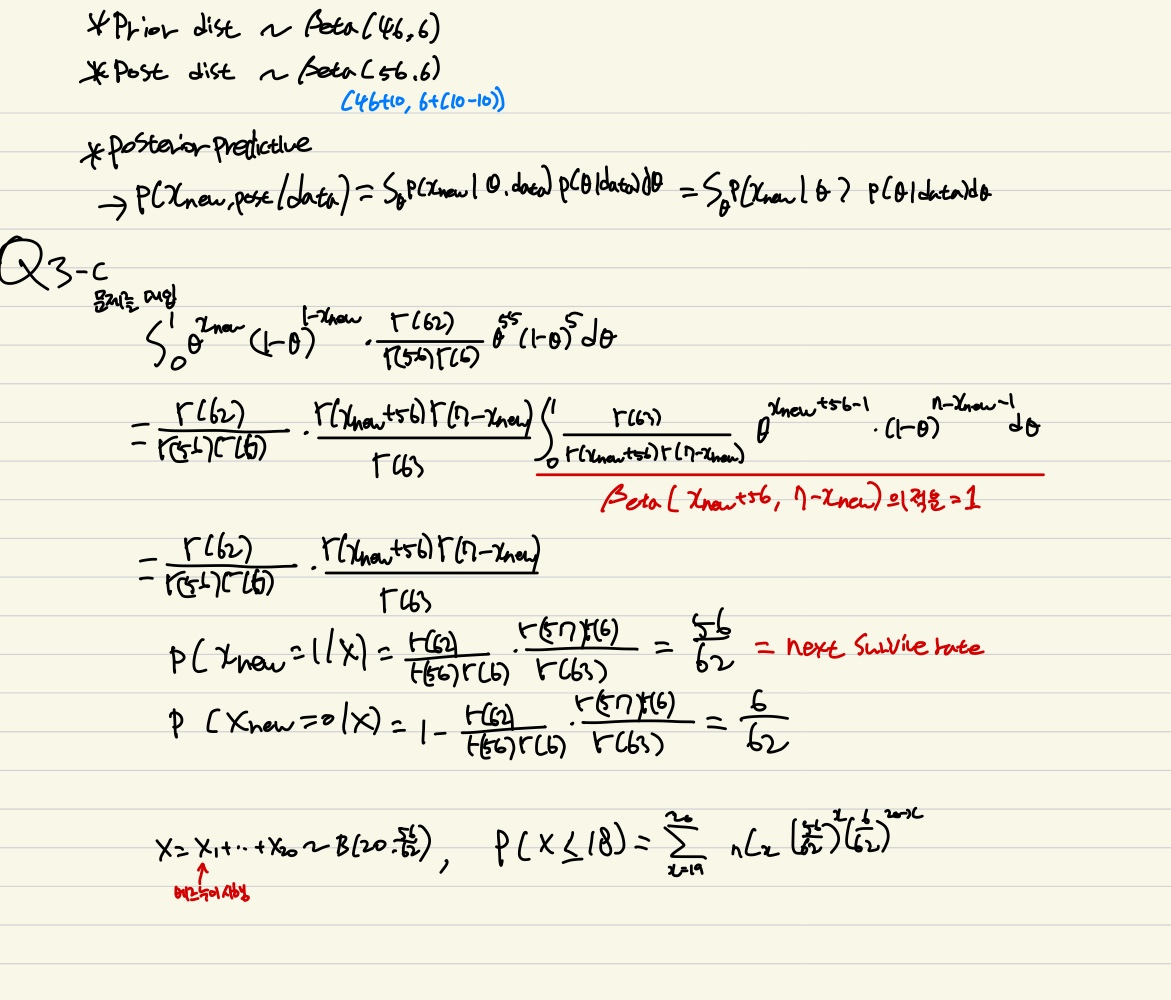